In [1]:
import sklearn


print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 1.1.3.


In [2]:
from platform import python_version

print(python_version())
from sklearn.feature_selection import VarianceThreshold



3.9.13


In [3]:
#Make necessary imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pycaret.datasets import get_data

dataset = pd.read_csv("C:\\Users\\Atul Bisht DIT\\ML PROJECT\\indian_liver_patient.csv")
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
#check the shape of data
dataset.shape

(583, 11)

In [5]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
# creating the training data
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
# creating the test data
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (554, 11)
Unseen Data For Predictions: (29, 11)


In [7]:
# Setting up Environment in PyCaret
from pycaret.classification import *

In [8]:
exp_clf101 = setup(data = data, target = 'Dataset',   session_id=123) 

                              transformer=LabelEncoder()), X=     Age Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     66   Male         1.000000               0.3                   190   
1     60   Male        22.799999              12.6                   962   
2     26   Male         7.100000               3.3                   258   
3     55   Male         4.400000               2.9                   230   
4     64   Male         1.400000               0.5                   298   
..   ...    ...              ...               ...                   ...   
382   42   Male        30.500000              14.2                   285   
383   42   Male         6.800000               3.2                   630   
384   60   Male ..., y=0      1
1      1
2      1
3      1
4      1
      ..
382    1
383    2
384    1
385    1
386    1
Name: Dataset, Length: 387, dtype: int8, message=None)
 Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-

                              transformer=LabelEncoder()), 
     Age Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     66   Male         1.000000               0.3                   190   
1     60   Male        22.799999              12.6                   962   
2     26   Male         7.100000               3.3                   258   
3     55   Male         4.400000               2.9                   230   
4     64   Male         1.400000               0.5                   298   
..   ...    ...              ...               ...                   ...   
382   42   Male        30.500000              14.2                   285   
383   42   Male         6.800000               3.2                   630   
384   60   Male ..., 
0      1
1      1
2      1
3      1
4      1
      ..
382    1
383    2
384    1
385    1
386    1
Name: Dataset, Length: 387, dtype: int8)
 Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\

                   transformer=VarianceThreshold(threshold=0)), 
      Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0    66.0     1.0         1.000000               0.3                 190.0   
1    60.0     1.0        22.799999              12.6                 962.0   
2    26.0     1.0         7.100000               3.3                 258.0   
3    55.0     1.0         4.400000               2.9                 230.0   
4    64.0     1.0         1.400000               0.5                 298.0   
..    ...     ...              ...               ...                   ...   
382  42.0     1.0        30.500000              14.2                 285.0   
383  42.0     1.0         6.800000               3.2                 630.0  ..., 
0      0
1      0
2      0
3      0
4      0
      ..
382    0
383    1
384    0
385    0
386    0
Name: Dataset, Length: 387, dtype: int64)
 Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\j

                   transformer=VarianceThreshold(threshold=0)), 
      Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
387  55.0     1.0         0.900000               0.2                 116.0   
388  20.0     0.0        16.700001               8.4                 200.0   
389  65.0     1.0         7.900000               4.3                 282.0   
390  48.0     0.0         1.000000               0.3                 310.0   
391  65.0     0.0         1.000000               0.3                 202.0   
..    ...     ...              ...               ...                   ...   
549  31.0     1.0         1.300000               0.5                 184.0   
550  36.0     1.0         0.800000               0.2                 158.0  ..., 
None)
 Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\memory.py", line 516, in _cached_call
    out = self.store_backend.load_item(
  File "C:\ProgramData\Anaconda3\lib\site-packages\

,Description,Value
0,Session id,123
1,Target,Dataset
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(554, 11)"
5,Transformed data shape,"(554, 11)"
6,Transformed train set shape,"(387, 11)"
7,Transformed test set shape,"(167, 11)"
8,Ordinal features,1
9,Numeric features,9


PyCaret by default imputes the missing value in the dataset by ‘mean’ for numeric features and ‘constant’ for categorical features. To change the imputation method, numeric_imputation and categorical_imputation parameters can be used within setup. 

In [9]:
# Comparing Model

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7211,0.7493,0.2432,0.5754,0.3236,0.1839,0.2169,0.6620
lda,Linear Discriminant Analysis,0.7183,0.7182,0.1712,0.5783,0.2485,0.1339,0.1755,0.0100
ridge,Ridge Classifier,0.7155,0.0000,0.1167,0.4200,0.1743,0.0908,0.1186,0.0090
dummy,Dummy Classifier,0.7132,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0120
rf,Random Forest Classifier,0.6745,0.6992,0.2439,0.4085,0.2912,0.1043,0.1136,0.0370
et,Extra Trees Classifier,0.6744,0.7274,0.2341,0.3970,0.2858,0.0965,0.1046,0.0340
gbc,Gradient Boosting Classifier,0.6720,0.6880,0.2621,0.3601,0.2959,0.1031,0.1016,0.0230
ada,Ada Boost Classifier,0.6642,0.6843,0.3341,0.3987,0.3609,0.1376,0.1388,0.0190
lightgbm,Light Gradient Boosting Machine,0.6642,0.6829,0.3167,0.4019,0.3453,0.1298,0.1329,0.1190
knn,K Neighbors Classifier,0.6568,0.6409,0.2530,0.3717,0.2964,0.0808,0.0858,0.2660


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

                   transformer=VarianceThreshold(threshold=0)), X=      Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0    66.0     1.0         1.000000               0.3                 190.0   
1    60.0     1.0        22.799999              12.6                 962.0   
2    26.0     1.0         7.100000               3.3                 258.0   
3    55.0     1.0         4.400000               2.9                 230.0   
4    64.0     1.0         1.400000               0.5                 298.0   
..    ...     ...              ...               ...                   ...   
382  42.0     1.0        30.500000              14.2                 285.0   
383  42.0     1.0         6.800000               3.2                 630.0  ..., y=0      0
1      0
2      0
3      0
4      0
      ..
382    0
383    1
384    0
385    0
386    0
Name: Dataset, Length: 387, dtype: int64, message=None)
 Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Create a Model

lr = create_model('et') # from the table above, we can see that LogisticRegression works the best

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7436,0.7776,0.1818,0.6667,0.2857,0.1875,0.2467
1,0.5897,0.5357,0.1818,0.2222,0.2000,-0.0722,-0.0728
2,0.7436,0.8555,0.4545,0.5556,0.5000,0.3299,0.3329
3,0.6667,0.7208,0.0909,0.2500,0.1333,-0.0201,-0.0241
4,0.5897,0.7208,0.1818,0.2222,0.2000,-0.0722,-0.0728
5,0.7179,0.7289,0.2727,0.5000,0.3529,0.1921,0.2065
6,0.6667,0.7130,0.2500,0.4286,0.3158,0.1152,0.1225
7,0.6579,0.6970,0.0909,0.2500,0.1333,-0.0249,-0.0299
8,0.6579,0.7795,0.2727,0.3750,0.3158,0.0952,0.0974


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
# Tune a Model

tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6923,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7105,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7105,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


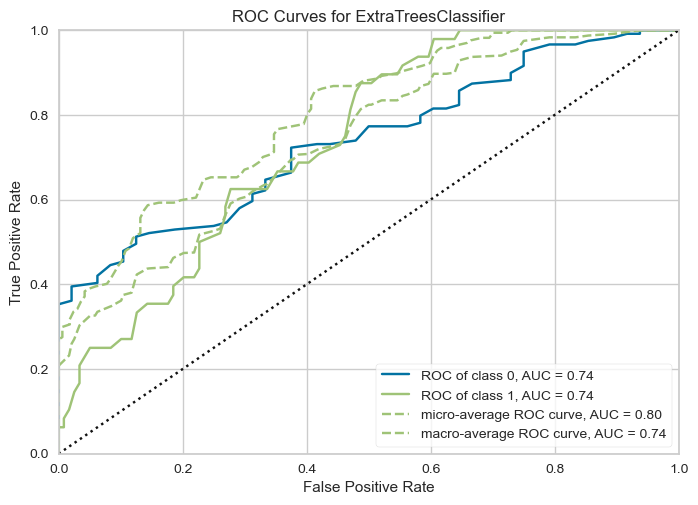

In [12]:
# Plotting Metrix
# ROC
plot_model(lr, plot = 'auc')

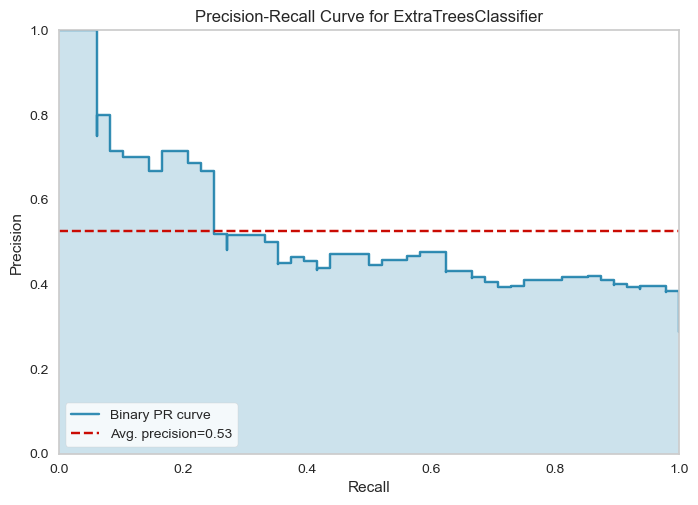

In [13]:
# Precision Recall curve
plot_model(lr, plot = 'pr')

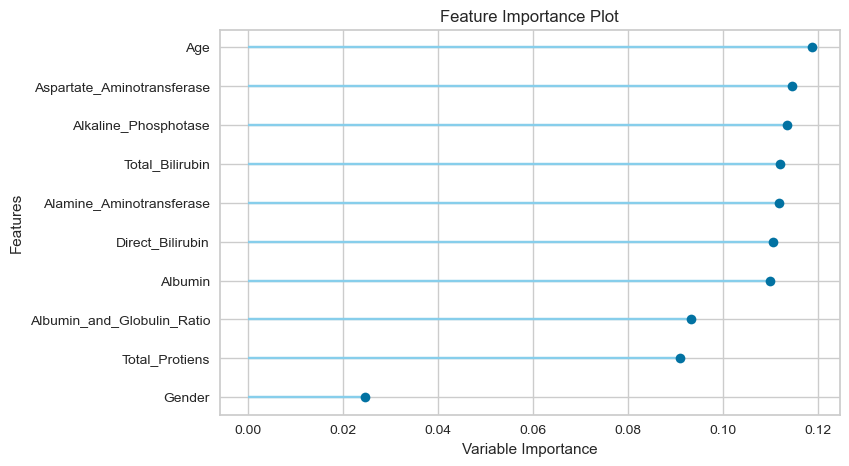

In [14]:
# Feature Importance Plot
plot_model(lr, plot='feature')

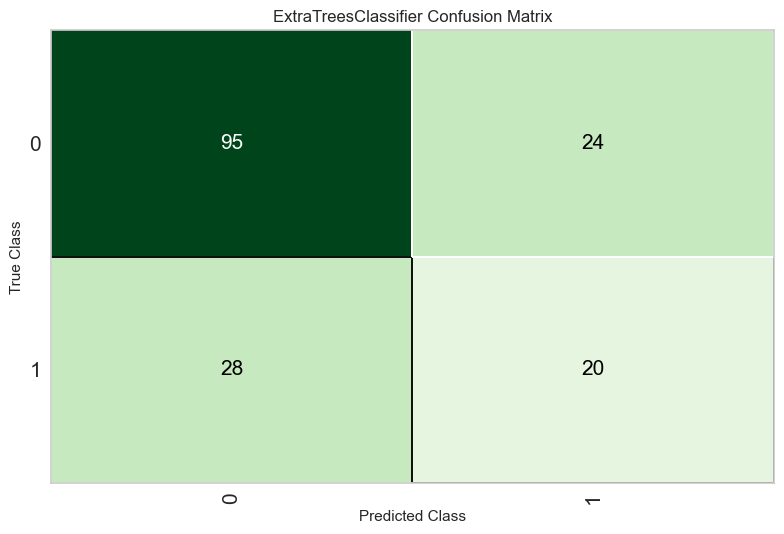

In [15]:
# Confusion Metrix

plot_model(lr, plot = 'confusion_matrix')

In [16]:
# Evaluate model

evaluate_model(lr)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7126,0.5000,0,0,0,0.0000,0.0000


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,prediction_label,prediction_score
387,55.0,1.0,0.900000,0.2,116.0,36.0,16.0,6.2,3.2,1.00,2,1,0.7132
388,20.0,0.0,16.700001,8.4,200.0,91.0,101.0,6.9,3.5,1.02,1,1,0.7132
389,65.0,1.0,7.900000,4.3,282.0,50.0,72.0,6.0,3.0,1.00,1,1,0.7132
390,48.0,0.0,1.000000,0.3,310.0,37.0,56.0,5.9,2.5,0.70,1,1,0.7132
391,65.0,0.0,1.000000,0.3,202.0,26.0,13.0,5.3,2.6,0.90,2,1,0.7132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,31.0,1.0,1.300000,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1,1,0.7132
550,36.0,1.0,0.800000,0.2,158.0,29.0,39.0,6.0,2.2,0.50,2,1,0.7132
551,12.0,1.0,0.800000,0.2,302.0,47.0,67.0,6.7,3.5,1.10,2,1,0.7132
552,56.0,1.0,1.000000,0.3,195.0,22.0,28.0,5.8,2.6,0.80,2,1,0.7132


In [18]:
# Predict on test data

unseen_predictions = predict_model(tuned_lr, data=data_unseen)
 
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8621,0.5000,0,0,0,0.0000,0.0000


                              transformer=LabelEncoder()), 
    Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0    73    Male         1.800000          0.900000                   220   
1    55    Male         0.800000          0.200000                   290   
2    51    Male         0.700000          0.100000                   180   
3    51    Male         2.900000          1.200000                   189   
4    51    Male         4.000000          2.500000                   275   
5    26    Male        42.799999         19.700001                   390   
6    66    Male        15.200000          7.700000                   356   
7    66    Male        16.600000          7.600000                   315   
8    66    Male ..., 
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    2
11    1
12    2
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    2
25    1
26    1
27    1
28    2
Na

                   transformer=VarianceThreshold(threshold=0)), 
     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   73.0     1.0         1.800000          0.900000                 220.0   
1   55.0     1.0         0.800000          0.200000                 290.0   
2   51.0     1.0         0.700000          0.100000                 180.0   
3   51.0     1.0         2.900000          1.200000                 189.0   
4   51.0     1.0         4.000000          2.500000                 275.0   
5   26.0     1.0        42.799999         19.700001                 390.0   
6   66.0     1.0        15.200000          7.700000                 356.0   
7   66.0     1.0        16.600000          7.600000                 315.0   
8   66...., 
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    1
25    0
26    0
27    0
28   

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,prediction_label,prediction_score
0,73.0,1.0,1.8,0.9,220.0,20.0,43.0,6.5,3.0,0.8,1,1,0.7132
1,55.0,1.0,0.8,0.2,290.0,139.0,87.0,7.0,3.0,0.7,1,1,0.7132
2,51.0,1.0,0.7,0.1,180.0,25.0,27.0,6.1,3.1,1.0,1,1,0.7132
3,51.0,1.0,2.9,1.2,189.0,80.0,125.0,6.2,3.1,1.0,1,1,0.7132
4,51.0,1.0,4.0,2.5,275.0,382.0,330.0,7.5,4.0,1.1,1,1,0.7132


In [19]:
# Save model

save_model(tuned_lr,'tuned_lr_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\ATULBI~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Total_Bilirubin',
                                              'Direct_Bilirubin',
                                              'Alkaline_Phosphotase',
                                              'Alamine_Aminotransferase',
                                              'Asparta...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight={}, criterion='gini',
                                       max_depth=3, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,
     

In [20]:
# Create a Model

dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5128,0.4123,0.1818,0.1667,0.1739,-0.1706,-0.1709
1,0.6154,0.5114,0.2727,0.3000,0.2857,0.0234,0.0234
2,0.7179,0.6104,0.3636,0.5000,0.4211,0.2407,0.2460
3,0.5897,0.4659,0.1818,0.2222,0.2000,-0.0722,-0.0728
4,0.6667,0.5471,0.2727,0.3750,0.3158,0.1027,0.1049
5,0.5897,0.4935,0.2727,0.2727,0.2727,-0.0130,-0.0130
6,0.6154,0.5602,0.4167,0.3846,0.4000,0.1176,0.1179
7,0.7105,0.6616,0.5455,0.5000,0.5217,0.3148,0.3154
8,0.7105,0.6616,0.5455,0.5000,0.5217,0.3148,0.3154


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
# Tune a Model

tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7179,0.7403,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7179,0.5065,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7179,0.7679,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7179,0.6769,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7179,0.6429,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7179,0.6851,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6923,0.6389,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7105,0.6414,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7105,0.7593,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [22]:
# Evaluate model

evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…